## 데이터마다의 분석 아이디어를 기록해두겠습니다!

1. '../DATA/elec_data.csv' : 경북대학교 전력 사용량 데이터
2. '../DATA/gas_data.csv' : 경북대학교 가스 사용량 데이터
3. '../DATA/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20231130.csv' : 전국 태양광 및 풍력 발전량 데이터

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. elec_data.csv

In [17]:
# 1. Load the data
data_elec = pd.read_csv('../DATA/elec_data.csv')
data_elec.tail(10)

,useYm,useQty
138,202305,129896.0
139,202306,140844.0
140,202307,164994.0
141,202308,167263.0
142,202309,182880.0
143,202310,175957.0
144,202311,130124.0
145,202312,149871.0
146,202401,172577.0
147,202402,141258.0


In [18]:
data_elec.describe()

,useYm,useQty
count,148.000000,148.000000
mean,201715.797297,50533.770270
std,391.708068,69484.844902
min,201101.000000,1.000000
25%,201401.750000,422.250000
50%,201710.500000,4774.000000
75%,202101.250000,129953.000000
max,202402.000000,191391.000000


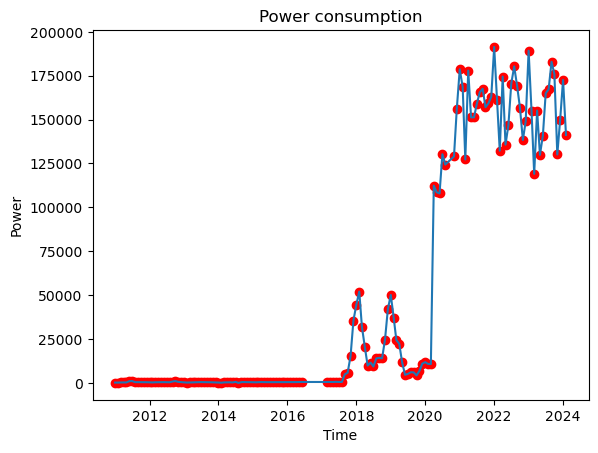

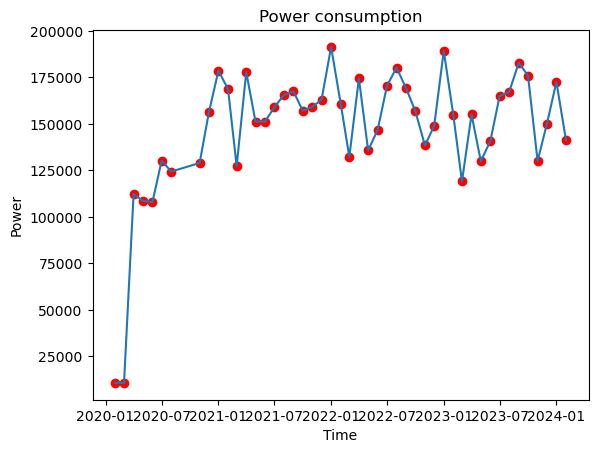

In [19]:
# useYm -> datetime format
data_elec['useYm'] = pd.to_datetime(data_elec['useYm'], format='%Y%m')

plt.plot(data_elec['useYm'], data_elec['useQty'])
plt.scatter(data_elec['useYm'], data_elec['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power consumption')
plt.show()

# over 2020-01
data_elec = data_elec[data_elec['useYm'] > '2020-01']
plt.plot(data_elec['useYm'], data_elec['useQty'])
plt.scatter(data_elec['useYm'], data_elec['useQty'], c='red')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power consumption')
plt.show()

In [ ]:
# 월별 전력 사용량

### 간단 분석
- 2020년대부터 10만kWh 이상의 전력 사용량 : 여기서부터 유효하다 보면 좋을 듯!

### 분석 아이디어
- 계절성을 띠네요
- 경북대 전력 사용량 추세 : 증가? 일정?  
    -> 일정하다 : 예전 자료로 전기요금 예측  
    -> 증가한다 : 경북대의 전력 사용량이 증가하는 이유 분석, 미래 전력 사용량 예측

## 2. gas_data.csv

In [ ]:
# load data
